# ***EXPERIMENT 11***

### **1. Lasso Regression (Least Absolute Shrinkage and Selection Operator)**
Regularization Type: L1 regularization
How It Works: Lasso adds the absolute sum of the model’s coefficients as a penalty term to the loss function. This encourages some coefficients to become exactly zero, leading to feature selection.
Mathematical Formulation:
Loss Function=∑(yi−y^i)2+λ∑∣βj∣
where 
λ controls the amount of shrinkage.
Advantages:
Performs feature selection by eliminating irrelevant features.
Useful when dealing with high-dimensional sparse data.
Disadvantages:
Can underperform when features are highly correlated since it selects only one and ignores others.
Can lead to model instability when feature selection changes significantly with small variations in data.
    
### **2. Ridge Regression**
Regularization Type: L2 regularization
How It Works: Ridge regression adds the squared sum of the coefficients as a penalty term to the loss function. Unlike Lasso, it does not shrink coefficients to zero but reduces their magnitude.
Mathematical Formulation:
Loss Function=∑(yi−y^i)2+λ∑βj2
where 
λ controls the degree of shrinkage.
Advantages:
Helps in handling multicollinearity by reducing the impact of correlated features.
Prevents overfitting by reducing model complexity.
Disadvantages:
Does not perform feature selection since it only shrinks coefficients but does not eliminate them.
May not work well when the dataset contains many irrelevant features.
    
### **3. ElasticNet Regression**
Regularization Type: Combination of L1 (Lasso) and L2 (Ridge) regularization
How It Works: ElasticNet incorporates both L1 and L2 penalties in its loss function. It first applies L1 regularization for feature selection, then applies L2 to stabilize coefficients.
Mathematical Formulation:
Loss Function=∑(yi−y^i)2+λ1∑∣βj∣+λ2∑βj2

where 
λ1	
  controls Lasso behavior and 
λ2	
  controls Ridge behavior.
Advantages:
Combines benefits of both Lasso and Ridge.
Works well when there are correlated features and a need for feature selection.
Disadvantages:
Requires tuning of two hyperparameters (λ1,λ2λ 1,λ 2).
Can be computationally expensive compared to Ridge and Lasso.


### *Load and Preprocess Dataset*
Load the spam dataset, retain relevant columns, rename them, and convert labels (ham = 0, spam = 1).

In [2]:
import pandas as pd

# Load the dataset
file_path = "/Users/kashika_jain/Downloads/spam.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Keep only the relevant columns and rename them
df = df[['v1', 'v2']].copy()
df.columns = ['label', 'message']

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display dataset info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


(None,
    label                                            message
 0      0  Go until jurong point, crazy.. Available only ...
 1      0                      Ok lar... Joking wif u oni...
 2      1  Free entry in 2 a wkly comp to win FA Cup fina...
 3      0  U dun say so early hor... U c already then say...
 4      0  Nah I don't think he goes to usf, he lives aro...)

### *Text Preprocessing using TF-IDF*
Convert text messages into numerical feature vectors using TF-IDF and split data into training/testing sets.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert text into numerical form using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### *Train Lasso Regression*
Train a Lasso model (L1 regularization) and predict spam messages.

In [4]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = (lasso.predict(X_test) >= 0.5).astype(int)


### *Train Ridge Regression*
Train a Ridge model (L2 regularization) and predict spam messages.

In [5]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = (ridge.predict(X_test) >= 0.5).astype(int)


### *Train ElasticNet Regression*
Train an ElasticNet model (combination of L1 & L2 regularization) and predict spam messages.

In [6]:
from sklearn.linear_model import ElasticNet

# Initialize and train ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predict on test set
y_pred_elastic = (elastic_net.predict(X_test) >= 0.5).astype(int)


### *Evaluate and Compare Performance*
Compute accuracy and visualize performance comparison using a bar plot.

Lasso Accuracy: 0.8655
Ridge Accuracy: 0.9749
ElasticNet Accuracy: 0.8655


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


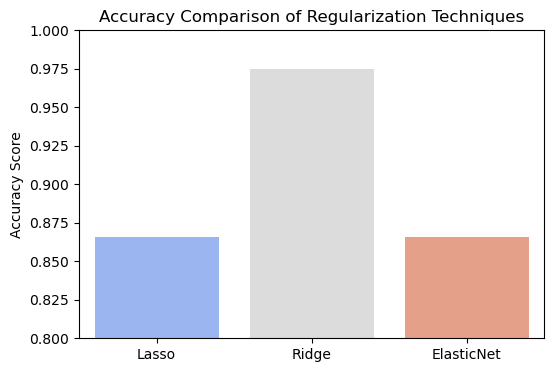

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute accuracy
lasso_acc = accuracy_score(y_test, y_pred_lasso)
ridge_acc = accuracy_score(y_test, y_pred_ridge)
elastic_acc = accuracy_score(y_test, y_pred_elastic)

# Print accuracy scores
print(f"Lasso Accuracy: {lasso_acc:.4f}")
print(f"Ridge Accuracy: {ridge_acc:.4f}")
print(f"ElasticNet Accuracy: {elastic_acc:.4f}")

# Create a bar plot to compare performance
plt.figure(figsize=(6, 4))
sns.barplot(x=['Lasso', 'Ridge', 'ElasticNet'], y=[lasso_acc, ridge_acc, elastic_acc], palette="coolwarm")
plt.ylim(0.8, 1.0)
plt.title("Accuracy Comparison of Regularization Techniques")
plt.ylabel("Accuracy Score")
plt.show()


### *Visualizing Confusion Matrices*
Display confusion matrices for all models to analyze classification performance.

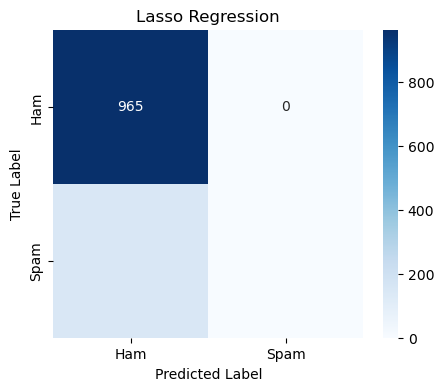

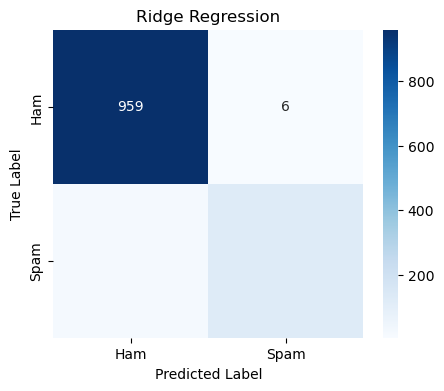

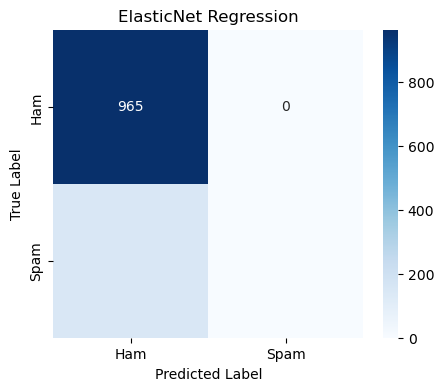

In [8]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lasso, "Lasso Regression")
plot_confusion_matrix(y_test, y_pred_ridge, "Ridge Regression")
plot_confusion_matrix(y_test, y_pred_elastic, "ElasticNet Regression")
